# ITS307 Data Analytics : Autumn Semester 2022
# Practical 10 

# Evaluation metrics

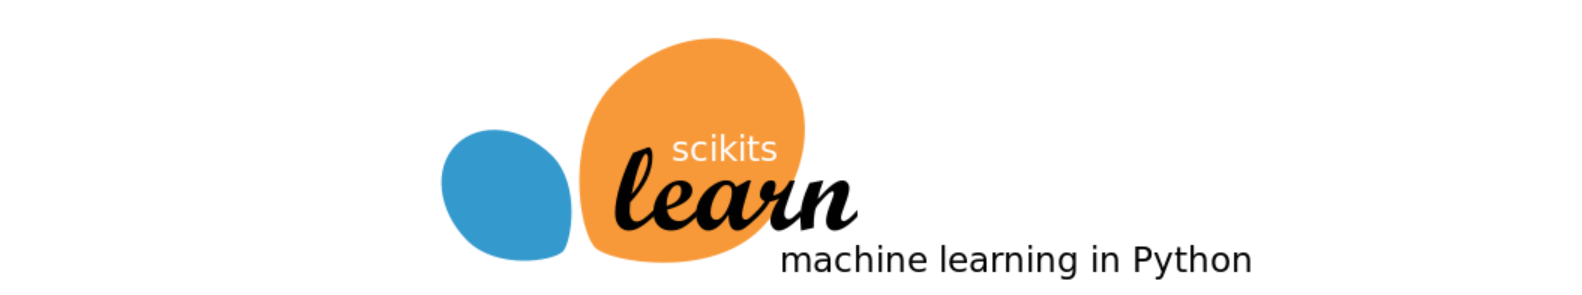

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> Handling Missing values</li>

<li> Scaling Numerical Features  </li>
<li> Encode Categorical Features  </li>
<li> Training Model</li>
<li> Evaluating Model</li>
<li> Making Prediction</li>
</ol>

# 0. Learning Objectives

For this test, we will use the Credit Card Approval dataset from the UCI Machine Learning Repository. Dataset has mixture of both numerical and categorical features with number of missing entries. The features of this dataset have been anonymized to protect the privacy, but some blog gives pretty good overview of the probable features. The probable features in a typical credit card application are `Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income` and finally the `ApprovalStatus`. For your understanding map the features descriptions given here with respect to columns in the dataset.

Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
  #### By the end of this lab, you should be able to predict whether an applicant will be getting credit card approval or not.

# 1. Importing Libraries 

Import all the necessary libraries here. If you don't remember all the libraries in this step, you may choose to import when required.

In [56]:
import pandas as pd

# 2. Loading and Cleaning Data with Pandas


##  2.1.  Load data
- To load data, mention feature names given above in section 1 and display first five and last five records.

In [57]:
df=pd.read_csv('creditcard.txt', header=None, names = ['Gender','Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode','Income', 'ApprovalStatus'])


## 2.2.  Print summary of the dataset

In [58]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearEmployed    690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None


In [59]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 2.3. Check null values for all the colums in the dataset

In [60]:
df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearEmployed      0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

## 2.4. Check datatypes of all the columns

In [61]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearEmployed      float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

In [62]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus'],
      dtype='object')

## 2.5 Cleaning data
- There are some columns which contains value as "?". Replace them with np.nan.

In [63]:
import numpy as np

In [64]:
df.replace(['?'],np.nan, inplace= True)

In [65]:
df.isna().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearEmployed       0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

## 2.6 Type conversion
- Some numerical features are not in expected types. Convert their types.

In [66]:
df["YearEmployed"]=df["YearEmployed"].astype(int)
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearEmployed        int32
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

# 3. Handling Missing Values

- Before handling missing value, store all the categorical data in `categorical_features` and numerical data in `numerical features`


- Print missing values of both categorical and numerical features before handling missing values

In [67]:
categorical_features=df.select_dtypes(['object'])
categorical_features.head()

,Gender,Age,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,ApprovalStatus
0,b,30.83,u,g,w,v,t,t,f,g,00202,+
1,a,58.67,u,g,q,h,t,t,f,g,00043,+
2,a,24.50,u,g,q,h,t,f,f,g,00280,+
3,b,27.83,u,g,w,v,t,t,t,g,00100,+
4,b,20.17,u,g,w,v,t,f,f,s,00120,+


In [68]:
numerical_features=df.select_dtypes(['number'])
numerical_features

,Debt,YearEmployed,CreditScore,Income
0,0.000,1,1,0
1,4.460,3,6,560
2,0.500,1,0,824
3,1.540,3,5,3
4,5.625,1,0,0
...,...,...,...,...
685,10.085,1,0,0
686,0.750,2,2,394
687,13.500,2,1,1
688,0.205,0,0,750


In [69]:
categorical_features.isna().sum()

Gender            12
Age               12
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
PriorDefault       0
Employed           0
DriversLicense     0
Citizen            0
ZipCode           13
ApprovalStatus     0
dtype: int64

In [70]:
numerical_features.isna().sum()

Debt            0
YearEmployed    0
CreditScore     0
Income          0
dtype: int64

## 3.1. Handling Missing values for Categorical variable
- Use sklearn SimpleImputer to impute categorical values with most frequest values. 

- Check missing records after imputation

In [78]:
from sklearn.impute import SimpleImputer
imputed=SimpleImputer(strategy='most_frequent')
imputer=imputed.fit_transform(categorical_features)
cdf=pd.DataFrame(imputer, columns=categorical_features.columns)
cdf.isna().sum()

Gender            0
Age               0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
Employed          0
DriversLicense    0
Citizen           0
ZipCode           0
ApprovalStatus    0
dtype: int64

## 3.2. Handling Missing values for numerical variable

- Use sklearn SimpleImputer to impute categorical values with most frequest values. 

- Check missing records after imputation

In [81]:
from sklearn.impute import SimpleImputer
imputed=SimpleImputer(strategy='most_frequent')
imputer=imputed.fit_transform(numerical_features)
cdf=pd.DataFrame(imputer, columns=numerical_features.columns)
cdf.isna().sum()

Debt            0
YearEmployed    0
CreditScore     0
Income          0
dtype: int64

# 4. Scaling Numerical Features
- Use any scaling techniques to scale all the numerical features

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler=MinMaxScaler(feature_range=(0,1))
numeric=scaler.fit_transform(numerical_features)
ndf=pd.DataFrame(numeric,columns=numerical_features.columns)
ndf.head()

,Debt,YearEmployed,CreditScore,Income
0,0.000000,0.035714,0.014925,0.00000
1,0.159286,0.107143,0.089552,0.00560
2,0.017857,0.035714,0.000000,0.00824
3,0.055000,0.107143,0.074627,0.00003
4,0.200893,0.035714,0.000000,0.00000


In [88]:
ndf.isna().sum()

Debt            0
YearEmployed    0
CreditScore     0
Income          0
dtype: int64

# 5. Encode Categorical data
- Since we are not aware of the type of categorical data, lets encode all features using OrdinalEncoder. If you are familiar with other encoding techniques, you may use them too.


- Use LabelEncoder to encode Target variable and store in variable `y`


- Concatenate Categorical and Numerical features together in single dataframe `X`


In [ ]:
from sklearn.pre

# 6. Training Model

## 6.1. Train test split
- Before training the model, split your data to train and test set. Keep your test size as 20%, and random_state value as 5. Also make sure that your test data contain equal number of data from both the clases.

## 6.2 Train the model
- Use any three different algorithm to train your model. Make sure you specify the right parameters for each one of them.

# 7. Evaluating the model

- Use score method to check accuracy of all the models


- Build confusion matrix for all the model and visualize using heatmap.


- Find Precision, Recall and F1-score

# 8. Making Prediction
- Take any sample record from your training data and make prediction.

# 9. Improve your model

- Use any technique to improve your model.